<a href="https://colab.research.google.com/github/jfjoung/AI_For_Chemistry/blob/main/notebooks/Week3_1_RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 **학습 목표:**  
- Python에서 **화학정보학(Cheminformatics)** 의 기본 개념을 이해한다.  
- `RDKit`을 사용하여 **분자 구조를 생성, 변환 및 시각화**하는 방법을 익힌다.  
- **분자 특성(Descriptors), 분자 지문(Fingerprints), 분자 유사도(Similarity)** 등을 분석하는 기법을 학습한다.  
- **화학 데이터베이스 검색 및 가상 스크리닝(Virtual Screening)** 을 수행하는 방법을 실습한다.  


## 📌 RDKit  

`RDKit`은 **화학정보학(Cheminformatics)** 을 위한 **오픈소스 소프트웨어 툴킷**입니다.  
이 툴킷은 **소분자 및 화합물의 분석 및 설계를 지원**하는 다양한 기능을 제공합니다.  

✅ **RDKit 주요 기능:**  
- **분자 구조 조작 및 분석**  
- **분자 특성(Descriptors) 및 분자 지문(Fingerprints) 계산**  
- **분자 간 유사도(Similarity) 분석**  
- **분자 시각화 및 렌더링**  
- **가상 스크리닝(Virtual Screening) 및 데이터베이스 검색**  

RDKit은 **학계 및 제약, 바이오테크, 화학 산업**에서 널리 사용되며,  
**리드 최적화(Lead Optimization)**, **화학 데이터베이스 관리**, **신약 탐색(Drug Discovery)** 등에 활용됩니다.  

---

## 📌 필수 라이브러리 설치 (Install Dependencies)  

RDKit을 사용하려면 먼저 **라이브러리를 설치해야 합니다.**  
아래 명령어를 실행하여 `RDKit`을 설치할 수 있습니다.  

```python
!pip install rdkit
```

이 명령어는 Shell 명령어이므로, 실행할 때 앞에 `!`를 붙여야 합니다.

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 25.6 MB/s eta 0:00:00


이제 `RDKit`이 설치되었으므로, 필요한 모듈을 불러오겠습니다. 🚀  


In [ ]:
from rdkit import Chem  # RDKit의 Chem 모듈 불러오기 (분자 구조 조작 및 분석 기능 포함)
from rdkit.Chem.Draw import IPythonConsole  # Jupyter Notebook에서 분자 구조를 시각적으로 표시하는 기능 활성화

## 📌 SMILES 및 분자의 기계적 표현  

우리는 RDKit 기능을 활용하기 위해 **특정 분자(카페인, Caffeine)** 를 살펴보겠습니다.  



<p align="middle">
  <img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/Caffeine_structure.svg.png" width="200"/>
</p>

하지만 **`caffeine`이라는 이름 자체는 분자 구조에 대한 정보를 포함하고 있지 않습니다.**  
컴퓨터가 **원자의 개수와 결합 형태**를 이해하려면,  
**기계가 읽을 수 있는 형태(machine-accessible representation)** 로 변환해야 합니다.  

---

## ✅ **SMILES란?**  

**SMILES** (*Simplified Molecular Input Line Entry System*) 는 **분자 구조를 문자열로 표현하는 방법**입니다.  
- **화학 분자를 컴퓨터에서 쉽게 처리할 수 있도록 기계가 읽을 수 있는 형태로 변환**합니다.  
- 원자 기호(C, H, O 등), **괄호, 결합 정보** 등을 사용하여 분자를 나타냅니다.  
- 예를 들어, **에탄올(C₂H₅OH)** 의 SMILES 표현은 `"CCO"` 입니다.  

SMILES 표현을 사용하면,  
- **대량의 화합물 비교 및 분석**이 가능하며,  
- **분자의 물리·화학적 특성을 예측하는 계산 작업**에 활용됩니다.  

---

## 📌 **카페인의 SMILES 표현 찾기**  

카페인의 SMILES 표현을 확인하려면  
**[Wikipedia](https://en.wikipedia.org/wiki/Caffeine) 또는 [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/2519)** 을 참고하세요!  


<p align="middle">
  <img src="https://raw.githubusercontent.com/jfjoung/AI_For_Chemistry/main/img/Caffeine_wiki.png" width="200"/>
</p>

In [ ]:
caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C' # Caffeine의 SMILES를 입력하세요

## 1 - 기본적인 분자 처리 (Basic Molecule Handling)  

이 섹션에서는 **RDKit을 사용하여 분자를 생성하고 다루는 방법**을 살펴보겠습니다.  
RDKit은 분자 구조를 **기계가 읽을 수 있는 형식(machine-readable format)** 으로 변환하고 분석할 수 있도록 도와줍니다.  

---

### ✅ **1.1 - 분자 생성 및 시각화 (Creating and Visualizing Molecules)**  

RDKit에서 가장 기본적인 기능 중 하나는 **분자를 생성하고 다루는 것**입니다.  

`Mol` 객체는 **RDKit에서 분자를 표현하는 핵심 객체**입니다.  
이 객체는 **SMILES 문자열, .sdf 파일 등 다양한 분자 표현 방식**으로부터 생성할 수 있습니다.  

우리는 가장 간단한 방법인 **`MolFromSmiles`** 함수를 사용하여,  
카페인(`caffeine`) 분자를 생성하고 이를 다뤄 보겠습니다.


In [ ]:
# SMILES 문자열을 사용하여 카페인 분자 객체(Mol) 생성
caffeine = Chem.MolFromSmiles(caffeine_smiles)

# 참고: 아래처럼 직접 SMILES 문자열을 전달해도 동일한 결과를 얻을 수 있음
# caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

Jupyter Notebook에서는 **변수명을 입력하고 셀을 실행하면 해당 변수의 값을 출력할 수 있습니다.**  
RDKit에서는 이를 활용하여 **분자 구조를 직접 시각화할 수 있습니다.**  

📌 **예제:**  
아래와 같이 분자 객체(`Mol`)의 변수를 입력하면, **해당 분자의 구조가 자동으로 표시됩니다.**  


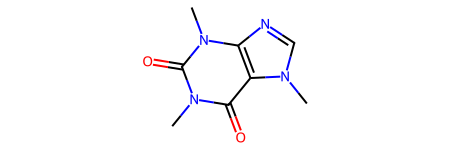

In [ ]:
caffeine

또 다른 유용한 기능은 **Mol 객체를 이미지로 저장하는 것**입니다.  
이렇게 하면 **분자 구조를 다운로드하거나 작업 디렉토리에 저장**할 수 있습니다.  

RDKit에서는 **`MolToImage` 함수**를 사용하여 **Mol 객체를 이미지 파일로 변환**할 수 있습니다.  
이제, 이를 활용하여 **카페인 분자의 구조를 이미지로 저장해 보겠습니다.**  


In [ ]:
from rdkit.Chem import Draw  # RDKit의 Draw 모듈 불러오기 (분자 시각화 기능 포함)

# 카페인 분자의 이미지 생성
im = Draw.MolToImage(caffeine)  # MolToImage 함수를 사용하여 분자 구조를 이미지로 변환

# 생성된 이미지를 PNG 파일로 저장 (현재 작업 디렉토리에 저장됨)
im.save('caffeine.png')


이미지가 정상적으로 저장되었는지 확인하려면, 현재 작업 디렉토리의 파일 목록을 확인하면 됩니다.  

##### 🏆 **Exercise 1: 그리드 이미지(GridImage) 생성하기**  

RDKit에서는 **여러 개의 분자를 하나의 이미지 파일에 그리드 형태로 저장**할 수 있습니다.  
이 기능은 **관련된 분자들을 비교하거나 시각적으로 분석할 때 유용**합니다.  

✅ **연습 목표:**  
1️⃣ **추가적인 두 개의 Mol 객체 생성**  
2️⃣ **세 개의 분자를 포함하는 그리드 이미지 생성**  
3️⃣ **이미지를 파일로 저장하여 확인**  

이제 **그리드 이미지**를 만들어보세요! 🚀  


In [ ]:
#### YOUR CODE HERE

# Theobromine과 Xanthine 분자 객체 생성 (SMILES 문자열을 삽입해야 함)
theobromine = Chem.MolFromSmiles('')  # Theobromine의 SMILES 문자열을 삽입하세요
xanthine = Chem.MolFromSmiles('')  # Xanthine의 SMILES 문자열을 삽입하세요

# 생성한 분자 객체들을 리스트에 저장
mols = [caffeine, theobromine, xanthine]  # 3개의 분자 객체 리스트

# 각 분자의 이름을 리스트에 저장
names = ["Caffeine", "Theobromine", "Xanthine"]  # 3개의 분자 이름 리스트

# 그리드 이미지 생성 (여러 개의 분자를 한 이미지에 배치)
grid = Draw.MolsToGridImage(mols, legends=names)  # 'mols' 리스트를 전달하여 이미지 생성

#### END

# 생성된 그리드 이미지 시각화
grid  # 분자들을 하나의 이미지로 확인


분자 간의 유사성을 쉽게 확인할 수 있나요? 그리드 이미지를 저장하면 나중에 비교할 때 더욱 편리합니다.  

📌 아래 코드를 실행하여 `GridImage`를 `.png` 파일로 저장하세요.


In [ ]:
# GridImage 객체에서 이미지 데이터를 추출
png = grid.data  # 생성된 이미지의 바이너리 데이터 가져오기

# 파일을 바이너리 쓰기 모드('wb+')로 열고 PNG 파일로 저장
with open('./grid_mols.png', 'wb+') as outf:
    outf.write(png)  # 추출한 이미지 데이터를 파일에 기록


#### ✅ 1.2 - 분자 조작하기 (Playing with Molecules)  

그렇다면, **Mol 객체란 정확히 무엇일까요?** 🤔  
가장 간단하게 말하면, **Mol 객체는 그래프(graph)로 표현된 분자**입니다!  

- **그래프의 꼭짓점(vertices)** → **원자(Atoms)**  
- **그래프의 간선(edges)** → **결합(Bonds)**  

따라서, **분자의 원자 및 결합 정보를 쉽게 추출하고 조작할 수 있습니다.**  
아래 예제를 실행하여 **카페인 분자의 원자 및 결합 개수**를 확인해 보세요!  


In [ ]:
# 카페인 분자의 총 원자 개수 가져오기
n_atoms = caffeine.GetNumAtoms()  # 분자 내 원자 개수 계산
print(f'N of atoms: {n_atoms}')  # 결과 출력

# 카페인 분자의 총 결합 개수 가져오기
n_bonds = caffeine.GetNumBonds()  # 분자 내 결합 개수 계산
print(f'N of bonds: {n_bonds}')  # 결과 출력


N of atoms: 14
N of bonds: 15


**원자(Atoms)와 결합(Bonds) 정보를 리스트로 변환하여 분석할 수도 있습니다.**  
이를 통해, **각 원자의 원자번호(Atomic Number) 및 결합의 종류(Bond Type)** 를 쉽게 확인할 수 있습니다.  

아래 예제를 실행하여 카페인 분자의 원자 및 결합 정보를 확인하세요!


In [ ]:
# 분자의 원자 객체를 리스트로 변환
atoms = list(caffeine.GetAtoms())  # 분자의 원자들을 리스트로 저장

# 분자 내 각 원자의 원자번호(Atomic Number) 출력
for atom in atoms:
    print(atom.GetAtomicNum())  # 원자번호 출력 (예: 탄소=6, 산소=8 등)

# 분자의 결합 객체를 리스트로 변환
bonds = list(caffeine.GetBonds())  # 분자의 결합들을 리스트로 저장

# 리스트에서 처음 세 개의 결합만 출력
for bond in bonds[0:3]:
    print(bond.GetBondType())  # 결합의 종류 출력 (예: 단일 결합, 이중 결합 등)


6
7
6
7
6
6
6
8
7
6
8
7
6
6
SINGLE
AROMATIC
AROMATIC


**특정 원자를 개별적으로 선택하여 해당 속성(Attributes)을 확인할 수도 있습니다.**  
이를 통해, **원자의 기호(Symbol), 결합된 원자 수(Degree), 혼성화 상태(Hybridization)** 등의 정보를 얻을 수 있습니다.  

아래 코드를 실행하여 카페인 분자의 특정 원자 속성을 확인하세요!


In [ ]:
# 카페인 분자의 특정 원자 선택 (예: 인덱스 3번 원자)
atom = caffeine.GetAtomWithIdx(3)  # 3번 인덱스에 해당하는 원자 가져오기

# 선택한 원자의 원소 기호(Symbol) 출력
print(atom.GetSymbol())  # 예: "N" (질소)

# 선택한 원자의 결합된 원자 개수(Degree) 출력
print(atom.GetTotalDegree())  # 해당 원자와 연결된 원자 개수 반환

# 선택한 원자의 혼성화 상태(Hybridization) 출력
print(atom.GetHybridization())  # 예: sp2, sp3 등


N
2
SP2


### ✅ 1.3 - 정규화(Canonicalization)  

**SMILES 표현 방식은 분자를 다루는 데 매우 유용하지만, 유일(unique)하지 않습니다.**  
즉, **동일한 분자를 여러 개의 다른 SMILES 문자열로 표현할 수 있습니다.**  

아래 예제에서는 **동일한 카페인 분자를 나타내는 세 가지 서로 다른 SMILES 문자열**을 사용합니다.  
각각을 RDKit을 사용하여 **Mol 객체로 변환한 후 비교 및 시각화**해 보겠습니다.  


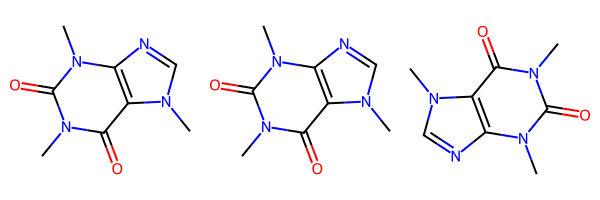

In [ ]:
# 동일한 카페인 분자를 나타내는 서로 다른 SMILES 문자열
caffeine1 = caffeine_smiles  # Wikipedia에서 찾은 SMILES
caffeine2 = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'  # 다른 형태의 카페인 SMILES
caffeine3 = 'Cn1c(=O)c2c(ncn2C)n(C)c1=O'  # 또 다른 형태의 카페인 SMILES

# SMILES 문자열을 리스트로 저장
smiles_list = [caffeine1, caffeine2, caffeine3]

# 각 SMILES 문자열을 Mol 객체로 변환
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# 변환된 분자들을 그리드 이미지로 시각화
Draw.MolsToGridImage(mols)


위에서 확인한 것처럼, **서로 다른 3개의 SMILES 문자열이 동일한 분자를 나타낼 수 있습니다.**  
이러한 문제를 방지하기 위해 **정규화(Canonicalization)** 를 적용할 수 있습니다.  

📌 **정규화란?**  
- **각 분자에 대해 유일한(Canonical) SMILES을 생성하는 과정**을 의미합니다.  
- 이를 통해 **동일한 분자가 항상 같은 SMILES로 변환되도록 보장**할 수 있습니다.  

이제 **RDKit을 사용하여 정규화된 SMILES을 생성해 보겠습니다.**


#### **Exercise 2 - 정규화 함수 만들기**  

**이전 단계에서 다뤘던 정규화되지 않은(non-canonical) 카페인 SMILES 리스트에 대해**  
**정규화된 SMILES를 생성하는 함수를 작성해 보세요.**  

RDKit의 **`MolToSmiles` 함수**는 Mol 객체를 SMILES로 변환하며,  
기본적으로 **정규화된(Canonicalized) SMILES를 생성합니다.**  
이를 활용하여 **정규화 함수(canonicalization function)** 를 만들어 보세요.  


In [ ]:
def canonicalize_smiles(smiles):
    '''이 함수는 비정규화된 SMILES를 받아
    정규화된 SMILES를 반환합니다.

    Args:
        - smiles: str, 비정규화된 분자의 SMILES

    Out:
        - canonical_smiles: str, 정규화된 분자의 SMILES
    '''

    mol = Chem.MolFromSmiles(smiles)  # 입력된 SMILES로부터 Mol 객체 생성
    canonical_smiles = Chem.MolToSmiles(mol)  # Mol 객체를 정규화된 SMILES로 변환

    return canonical_smiles


이제 위에서 작성한 **정규화 함수**를 비정규화된 SMILES 리스트에 적용해 보세요.  
함수를 적용하면 **정규화된 SMILES (동일한 SMILES)** 를 얻을 수 있습니다.  

In [ ]:
# 비정규화된 SMILES 리스트에 정규화 함수 적용
canonical_smiles = [canonicalize_smiles(smiles) for smiles in smiles_list]  # 정규화된 SMILES 리스트 생성

# 새로운 정규화된 SMILES 리스트 출력
for smiles in canonical_smiles:
    print(smiles)


Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O


**정규화(Canonicalization)에는 하나의 고유 표준이 존재하지 않습니다.**  
즉, 생성된 SMILES은 사용된 **화학정보학 툴킷(cheminformatics toolkit)** 및 **툴킷의 버전**에 따라 달라질 수 있습니다.  

📌 **따라서, 동일한 결과를 비교하려면 항상 같은 패키지와 버전을 사용하는 것이 권장됩니다.**  


### ✅ 1.4 - 분자 지문(Fingerprints)  

**머신러닝 알고리즘은 보통 숫자 벡터를 입력으로 받습니다.**  
하지만 우리는 분자를 다루고 있는데,  
**어떻게 분자를 숫자화하여 ML 알고리즘에 전달할 수 있을까요?** 🤔  

#### 🔑 **[분자 지문(Molecular Fingerprints)](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors):**  
- **분자를 비트 배열(0과 1의 배열)** 로 표현하는 벡터입니다.  
- **분자 구조를 인코딩**하여 머신러닝 모델에 입력으로 제공할 수 있습니다.  
- **분자 간 유사도 계산, 분류 모델 입력, 리그랜드-수용체 상호작용 예측** 등에 사용됩니다.  
- **RDKit에서는 [Morgan Fingerprint](https://www.rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints)**가 널리 사용됩니다.  
  - **`GetMorganFingerprintAsBitVect`** 함수를 사용해 벡터를 생성할 수 있습니다.  
  - **Radius**와 **bit 길이**를 설정하여 특정 크기의 벡터를 생성합니다.  


In [ ]:
from rdkit.Chem import AllChem  # RDKit의 AllChem 모듈 불러오기 (Morgan Fingerprint 함수 포함)
import numpy as np  # numpy 모듈은 나중에 필요할 수 있음

# Morgan Fingerprint 생성: 반경(radius)=2, 비트 길이=1024
caffeine_fp = AllChem.GetMorganFingerprintAsBitVect(caffeine, 2, nBits=1024)

# 벡터의 비트 길이 출력
print(caffeine_fp.GetNumBits())  # 예: 1024 (벡터의 총 비트 수)



1024


[03:50:51] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
# 벡터를 리스트 형식으로 변환하여 확인
print(caffeine_fp.ToList())  # 비트 벡터를 0과 1의 배열로 확인

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [ ]:
# 1이 있는 인덱스들
on_bits = list(caffeine_fp.GetOnBits())

# 출력
print("On-bit indices:", on_bits)
print("Number of on bits:", len(on_bits))

On-bit indices: [0, 33, 121, 179, 234, 283, 314, 330, 356, 378, 385, 400, 416, 428, 463, 493, 504, 564, 650, 672, 771, 849, 932, 935]
Number of on bits: 24


##### **Exercise 3 - Tanimoto 거리(Tanimoto Distance)를 사용한 분자 유사성 분석**  

**이 연습에서는 지문(Fingerprint)과 [Tanimoto 유사도](https://en.wikipedia.org/wiki/Jaccard_index)를 사용하여**  
**화학 정보를 추출하는 방법을 배웁니다.**  

#### 🔑 **Tanimoto 유사도:**  
- **두 개의 지문 간 공유된 비트를 기반으로 분자 유사성을 측정**합니다.  
- **값이 1에 가까울수록 두 분자는 더 비슷합니다.**  

✅ **연습 목표:**  
1️⃣ **Toluene**과 **Theobromine**의 **Morgan Fingerprint** (반경 r=2, nBits=1024)를 생성  
2️⃣ 이 지문을 사용하여 **Caffeine**과의 **Tanimoto 유사도**를 계산  
3️⃣ 각각의 유사도를 출력  


In [ ]:
# 이전에 생성한 카페인 지문(caffeine_fp)과 theobromine 객체를 사용
from rdkit.DataStructs import FingerprintSimilarity  # Tanimoto 유사도 계산 함수

#### YOUR CODE
toluene = Chem.MolFromSmiles('')  # toluene의 SMILES 문자열 삽입

# Toluene 및 Theobromine의 Morgan Fingerprint 생성
toluene_fp = AllChem.GetMorganFingerprintAsBitVect(toluene, 2, nBits=1024)  # Toluene 지문 생성
theobromine_fp = AllChem.GetMorganFingerprintAsBitVect(theobromine, 2, nBits=1024)  # Theobromine 지문 생성

# Tanimoto 유사도 계산
sim1 = FingerprintSimilarity(caffeine_fp, toluene_fp)  # 카페인-Toluene 유사도 계산
sim2 = FingerprintSimilarity(caffeine_fp, theobromine_fp)  # 카페인-Theobromine 유사도 계산
#### END

# 계산된 유사도 출력
print(f'Caffeine-toluene similarity: {round(sim1, 3)}')
print(f'Caffeine-theobromine similarity: {round(sim2, 3)}')


[03:55:04] DEPRECATION WARNING: please use MorganGenerator


NameError: name 'theobromine' is not defined

### ✅ 1.5 - [Bemis-Murcko 스캐폴드(Bemis-Murcko Scaffold)](https://pubs.acs.org/doi/10.1021/jm9602928)

**분자를 기본적인 스캐폴드(scaffold) 또는 핵심 분자 모티프(core molecular motif)로 분해할 수 있습니다.**  
이러한 분해는 **다양한 화합물을 비교하거나 그룹화**하는 데 유용합니다.  

#### 🔑 **Bemis-Murcko 분해법:**  
- **분자의 기본 프레임워크를 반환**합니다.  
- 이를 통해 **동일한 기본 구조를 공유하는 화합물**을 쉽게 식별할 수 있습니다.  
- RDKit에서는 **Bemis-Murcko 스캐폴드**를 손쉽게 구할 수 있는 함수를 제공합니다.  


In [ ]:
from rdkit.Chem.Scaffolds import MurckoScaffold  # Bemis-Murcko 스캐폴드 추출 함수

# Mol 객체에서 Bemis-Murcko 스캐폴드 추출
caff_scaffold = MurckoScaffold.GetScaffoldForMol(caffeine)

# 원래 분자 표시
display(caffeine)  # 원래의 카페인 분자 구조 표시

# 추출된 Bemis-Murcko 스캐폴드 표시
caff_scaffold  # 스캐폴드 구조 표시


**카페인과 테오브로민(Theobromine) 스캐폴드를 비교해 보면,**  
**이 두 분자가 매우 유사하다는 것을 알 수 있습니다.**  
아래 코드를 실행하여,  
두 분자의 Bemis-Murcko 스캐폴드를 시각적으로 비교해 보세요.  


In [ ]:
# 테오브로민 분자의 Bemis-Murcko 스캐폴드 추출
theobr_scaffold = MurckoScaffold.GetScaffoldForMol(theobromine)

# 두 스캐폴드를 그리드 이미지로 시각화
Draw.MolsToGridImage(
    [caff_scaffold, theobr_scaffold],  # 비교할 스캐폴드 리스트
    legends=['caffeine scaffold', 'theobromine scaffold']  # 각각의 레이블
)

### **결론**  
이 세션에서는 **RDKit을 활용하여 다음 작업들을 수행하는 방법**을 배웠습니다:  
- **기본 분자 작업**  
- **지문(Fingerprint) 생성 및 분자 비교**  
- **분자 특성(Descriptors) 계산**  
- **서브구조 검색**  

이러한 작업은 **화학정보학(Cheminformatics)** 과 **머신러닝(ML)** 에서  
자주 수행되는 기본적인 작업들이며,  **계속 연습을 통해 숙달하는 것**이 중요합니다!

---

### **추가 학습 자료**  
**화학정보학에 대한 더 많은 세부 정보를 확인하려면 다음 리소스를 참조하세요:**  
- [Cheminformatics Blog by Iwatobipen](https://iwatobipen.wordpress.com/)  
- [RDKit Blog by Greg Landrum](https://greglandrum.github.io/rdkit-blog/)  
- [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html)  
